In [ ]:
import pickle as pkl
with open("plant_images_flower.pkl", "rb") as f:
  voynich = pkl.load(f)

with open("erbario_plant_images_flower.pkl", "rb") as f:
  erbario = pkl.load(f)

with open("tractatus_plant_images_flower.pkl", "rb") as f:
  tractatus = pkl.load(f)

In [ ]:
print(voynich[0])

{'file': 'page170_2_cleaned.jpeg', 'emb': tensor([[-2.0223e-02, -4.6730e-02,  1.4370e-03, -5.8833e-02, -3.0058e-02,
         -5.2898e-02,  9.5088e-03, -6.7726e-02, -5.6947e-02, -1.3771e-02,
         -9.4759e-03, -2.6302e-02,  5.7642e-03, -6.0665e-02, -4.1402e-02,
         -9.5566e-03, -9.2590e-03, -2.2783e-02,  1.2861e-02, -6.4562e-02,
         -2.0938e-02, -8.7220e-03, -2.8984e-02, -1.4362e-02,  2.3430e-02,
         -2.2977e-02,  1.6589e-03, -3.5308e-02, -5.3711e-02, -1.9089e-02,
         -2.1386e-02, -3.9516e-02, -4.4558e-02,  4.8272e-03, -3.4677e-02,
         -5.9723e-04, -6.8292e-02, -2.8702e-02, -2.0341e-02,  2.3340e-03,
         -4.5574e-02, -2.6942e-02, -2.6638e-02,  2.2547e-02, -5.4729e-02,
          2.7762e-02, -4.5134e-02, -2.0703e-02, -3.6729e-02, -3.5284e-02,
         -1.2699e-02, -3.0605e-02,  2.0065e-02,  1.1398e-03, -3.1149e-02,
          1.0070e-03, -1.0697e-01, -1.5815e-02, -1.7092e-04,  5.6342e-03,
         -2.2149e-02, -1.9175e-02, -3.3290e-02, -1.8836e-02, -4.7415e-

In [ ]:
import numpy as np
X = []
y_true = []
for img in voynich:
  X.append(img['emb'][0])
  y_true.append(0)

for img in erbario:
  X.append(img['emb'][0])
  y_true.append(1)

for img in tractatus:
  X.append(img['emb'][0])
  y_true.append(2)

X = np.array(X)
print(X.shape)

(1040, 768)


In [ ]:
from sklearn.decomposition import PCA
pca= PCA(2)
X_new = pca.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

y_pred = KMeans(n_clusters=3, random_state=0, n_init="auto").fit_predict(X_new)

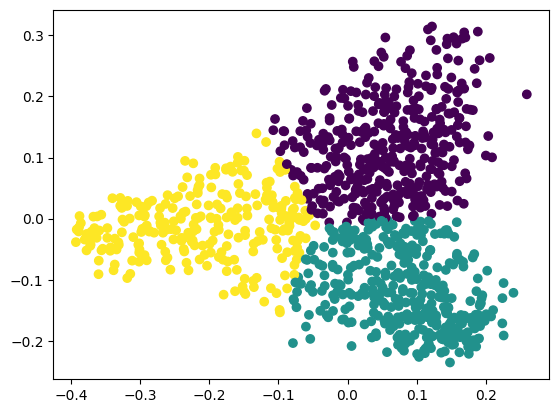

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred)

In [26]:
X_voynich = []
X_erbario = []
X_tractatus = []


for i, x in enumerate(X_new):
  if y_true[i] == 0:
    X_voynich.append(x)
  elif y_true[i] == 1:
    X_erbario.append(x)
  elif y_true[i] == 2:
    X_tractatus.append(x)
  else:
    print("What the...")
X_voynich = np.array(X_voynich)
X_erbario = np.array(X_erbario)
X_tractatus = np.array(X_tractatus)

Text(0.5, 1.0, 'PCA Graph For Flower Embeddings')

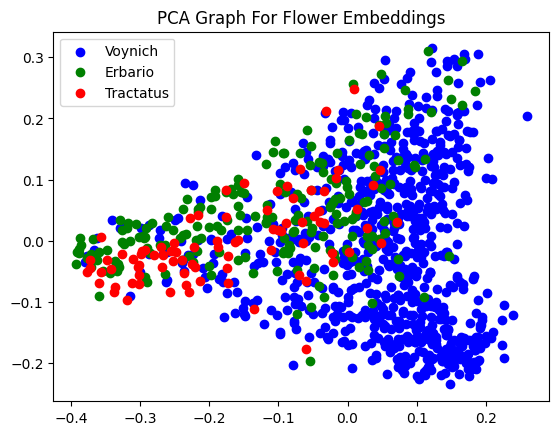

In [27]:
plt.scatter(X_voynich[:, 0], X_voynich[:, 1], c="blue", label="Voynich")
plt.scatter(X_erbario[:, 0], X_erbario[:, 1], c="green", label="Erbario")
plt.scatter(X_tractatus[:, 0], X_tractatus[:, 1], c="red", label="Tractatus")
plt.legend()
plt.title("PCA Graph For Flower Embeddings")


In [ ]:
def cos_similarity(v1, v2, v1_norm, v2_norm):
  return np.dot(v1, v2) / (v1_norm * v2_norm)

v_top_comparison = [] # each thing should have a dict associated with it


for v in voynich:
  v_emb = np.array(v['emb'][0])
  v_norm = np.linalg.norm(v_emb)
  max_e_cos_sim = -2.0
  best_e = {}
  for e in erbario:
    e_emb = np.array(e['emb'][0])
    e_norm = np.linalg.norm(e_emb)
    cos_sim = cos_similarity(v_emb, e_emb, v_norm, e_norm)
    if cos_sim > max_e_cos_sim:
      best_e = e
      max_e_cos_sim = cos_sim

  max_t_cos_sim = -2.0
  best_t = {}
  for t in tractatus:
    t_emb = np.array(t['emb'][0])
    t_norm = np.linalg.norm(t_emb)
    cos_sim = cos_similarity(v_emb, t_emb, v_norm, t_norm)
    if cos_sim > max_t_cos_sim:
      best_t = t
      max_t_cos_sim = cos_sim
  v_top_comparison.append((v, best_e, best_t, max_e_cos_sim, max_t_cos_sim))


In [ ]:
sorted_v = v_top_comparison.copy()
sorted_v.sort(reverse=True, key=lambda t: t[3])

In [ ]:
with open("closest_images_embeddings_flower.pkl", "wb") as f:
  pkl.dump(sorted_v, f)